In [1]:
import numpy as np
import pandas as pd
import re
import os
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import glob

In [2]:
def preprocessing(filename):
    """Read a file and preprocessing ,return a token list"""
    content = read_file(filename)
    token_list = tokenization(content)
    token_list = remove_stop_word(token_list)
    token_list = sorted(token_list)
    return token_list

def read_file(filename):
    """Read the file of dictionary and return a string"""
    now_path = os.path.dirname(os.path.abspath("__file__"))+'/'
    f_value = open(now_path + filename, 'r', encoding='UTF-8-sig')
    content = f_value.read()
    f_value.close()
    return content


def addJiebaWordDic(filename):
    """Read jieba word dict from file"""
    # read jieba word dict from file
    jiebaWordDict = read_file(filename)
    # split by \n
    jiebaWordDict = jiebaWordDict.split("\n")
    # remove empty item
    jiebaWordDict = list(filter(None, jiebaWordDict))
    # add word dict
    for word in jiebaWordDict:
        jieba.add_word(word, freq=None, tag=None)

def tokenization(content):
    """Tokenization"""
    #remove \t\n\r\f\v
    content = re.sub('[\t\n\r\f\v]', '', content)
    #remove " "
    content = re.sub(' ', '', content)
    #remove "　"
    content = re.sub('　', '', content)
    #remove [a-zA-Z]
    content = re.sub('[a-zA-z]', '', content)
    #remove [0-9]
    content = re.sub('[0-9]', '', content)
    #remove punctuation marks -> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
    puncs = '，、：。～「」；？！「」『』—（）…－“–”〃〜─ㄧ＂︰％｢｣╱《》【】〔〕／•＋○■〈〉﹚＼'
    content = re.sub('['+puncs+']', '', content)
    content = re.sub('['+string.punctuation+']', '', content)

    # to jieba word dict
    token_list = jieba.cut(content, cut_all=False)
    token_list = list(token_list)

    #remove empty item
    token_list = list(filter(None, token_list))

    return token_list


def remove_stop_word(token_list):
    """remove stop word"""
    #Read Stop Word List
    stop_word_list = read_file('stop-word-list.txt')
    stop_word_list = stop_word_list.split('\n')
    #remove stop word from token_list
    token_list = [token for token in token_list if token not in stop_word_list]
    return token_list


def wordDict(token_list):
    """construct a word dictionary from token list"""
    wordDict = {}
    for w in token_list:
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1
    return wordDict

def wordCloudImg(filename, word_Dict):
    """show a wordCloud img from word_Dict"""
    font = "/Library/Fonts/Microsoft/Microsoft Jhenghei.ttf"
    wordcloud = WordCloud(background_color="white", width=2000, height=1000, margin=2, font_path=font)
    wordcloud.fit_words(word_Dict)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud)
    wordcloud.to_file(filename)

def topTenWordImg(filename, word_Dict):
    """show img with top ten word from word_Dict"""
    words = sorted(word_Dict.items(), key=lambda x: x[1], reverse=True)
    top_ten_word = words[:10]
    print(top_ten_word)
    label = []
    data = []
    for word in top_ten_word:
        label.append(word[0])
        data.append(word[1])
    fig = plt.figure(figsize=(10, 6))
    plt.bar(range(0, 10), data)
    plt.xticks(range(0, 10), label, fontsize=20)
    plt.show()
    fig.savefig(filename)

def write_file(filename, token_list):
    """write files"""
    now_path = os.path.dirname(os.path.abspath("__file__"))+'/'
    f_value = open(now_path + filename, 'w', encoding='UTF-8')
    for token in token_list:
        f_value.write("%s\n" % token)
    f_value.close()


def not_normal_stock():
    """output img of not normal stock """
    not_normal = []
    for file in glob.glob(r'妖股/*/*.txt'):
        file_token = preprocessing(file)
        not_normal.extend(file_token)
    word_Dict = wordDict(not_normal)
    wordCloudImg("妖股img.png", word_Dict)
    topTenWordImg("妖股top_ten.png", word_Dict)
    write_file('妖股token_list''.txt', not_normal)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/9l/y12qsfms1wg6wlz7_c_b3hf00000gn/T/jieba.cache
Loading model cost 1.349 seconds.
Prefix dict has been built succesfully.


[('董事', 174), ('億元', 147), ('世紀', 131), ('威盛', 130), ('離岸', 114), ('風電', 94), ('旺宏', 94), ('智慧', 89), ('水下', 89), ('基礎', 88)]


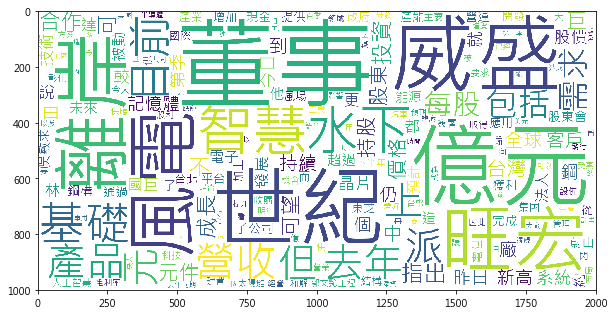

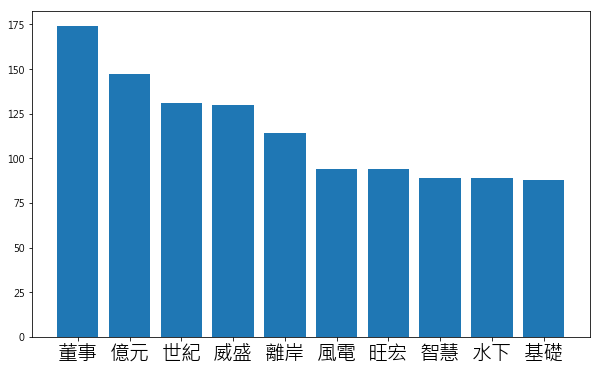

In [3]:
not_normal_stock()

In [4]:
addJiebaWordDic("jiebaWordDict.txt")

In [5]:
fileName = []
corpus = []
company = []
stockType = []

In [6]:
for file in glob.glob(r'妖股/*/*.txt'):
    name = os.path.basename(file)
    fileName.append(name)
    if "世紀鋼" in name:
        company.append("世紀鋼")
    elif "國巨" in name:
        company.append("國巨")
    elif "大同" in name:
        company.append("大同")
    elif "威盛" in name:
        company.append("威盛")
    elif "旺宏" in name:
        company.append("旺宏")
    file_token = preprocessing(file)
    file_token_all = " ".join(file_token)
    corpus.append(file_token_all)
    stockType.append("妖股")
    
    print(name)
    print(file_token)

2018-02-02 國巨.txt
['一波國', '一致', '上', '上', '上', '上游', '上游', '下午', '不', '不利因素', '不堪', '不易', '中', '中大', '中大', '中華區', '之下', '之外', '二度', '交期', '仍', '代表', '以上', '以上', '以及', '以車', '估值', '估波', '估計', '但是', '供給', '個', '做', '偶業界', '傳出', '價格', '價格', '價格', '價格', '價行動', '價行動', '億億元', '億元', '內文', '全年', '全年', '兩波', '再漲', '分析', '初', '別是', '券商', '力道', '加上', '加上', '加上', '動作', '勢', '匯率', '占', '占', '厚膜', '厚膜', '受到', '可望', '可望', '可望', '台商', '台廠', '品特', '商不多', '啟動', '啟動', '因', '國巨', '國巨', '國巨將', '在外', '地區', '均', '坦言', '基板', '基板', '壓力', '多項', '大', '大型', '大型', '大陸', '大雪', '大電', '如何', '客戶', '將上', '將落', '將針', '對象', '小時', '尺寸', '尺寸', '尺寸', '工商', '工薪', '巨', '巨', '巨', '巨', '巨', '巨', '巨', '巨大', '巨年', '已有', '幅度', '廠', '廠', '廠', '廠', '廠', '廠商', '廠商', '廠廠', '影響', '影響', '從', '從產能', '心理', '持續', '指出', '指出', '挑戰元', '掃貨', '排阻', '接收', '提前', '擅長', '擴大', '擴產', '攀升', '收到', '放量', '政府', '新產能', '日系', '日起', '旺', '旺季', '昆山', '昆山', '昨日', '昨日', '時報', '時間', '晶片', '晶片', '晶片', '晶片', '晶片', '晶片', '晶片', '晶片', '晶片', '晶片', '替', '最高', '有待', '未

2018-06-08 威盛2.txt
['不錯', '並', '中國', '主要', '互動', '人工智慧', '人工智慧', '介面', '具有', '到', '包括', '可', '台語', '合作', '商業化', '商萬思', '問題', '問題', '喚', '因觸', '國台', '場景', '大陸廠', '威盛', '威盛', '威盛', '威盛', '將可', '小鯨', '小鯨', '平台', '平台', '平板', '引擎', '引擎', '成功', '手勢', '手勢', '控', '控制指令', '控制指令', '推出', '推出', '搶', '操控', '操控', '擴充', '攜手', '新型', '智慧', '智慧', '楊凱翔', '模式', '歐拉蜜', '歐拉蜜', '歐拉蜜', '水準', '水漬', '混合', '燈除', '產品', '產品', '科技', '科技', '編輯', '萬思', '萬思進', '衛浴', '衛浴', '衛浴', '複', '觸控', '訂', '訂', '設備', '設備', '設置', '設置', '設計廠', '詞', '語鏡', '語鏡', '語鏡', '語鏡', '語鏡類', '語音', '語音', '語音', '語音', '軍衛浴', '較', '輕', '辨識', '辨識', '辨識', '近期', '造成', '進展', '進衛浴', '達', '避免', '還可', '都', '醒', '鏡產品', '鏡面', '開放', '開放', '開關', '陸廠', '雜性', '離線', '霧', '鬆']
2018-06-03 威盛.txt
['上周', '下', '且現', '人工智慧', '人工智慧', '人工智慧', '伺服器', '伺服器', '元', '切入', '切入', '切入', '到', '到', '到', '到', '各種', '吳億盼', '商店', '商機', '商機', '單周', '四大', '四大', '城市', '威盛', '威盛', '威盛', '威盛', '威盛', '寫', '將以', '嵌入式', '嵌入式', '工商', '已經', '平台', '平台', '從', '徹底', '應用', '成果', '打入', '拓及', '掌握', 

2018-04-18 世紀鋼.txt
['三年期', '三項', '上述', '世紀', '並以', '並號', '中心', '中心', '中心', '主導', '主軸', '主辦', '之中', '了', '交流', '亦', '來訪', '供', '供', '供應', '促使', '促進', '億', '億元', '元', '內', '內', '公布', '共', '共同', '共同', '別來', '創新', '力量', '動', '包括', '包括', '協會', '參', '及營運', '召國內', '可', '可達', '台', '台', '台', '台北', '合作', '合作', '合作', '合作', '合作', '合家', '合家', '吸引', '吸引', '商來', '商機', '商與業者', '單樁', '國', '國內', '國內', '國際', '國際', '國際', '國際廠', '國際業者', '園區', '地', '域分', '培育', '基', '基礎', '基礎', '基礎', '基礎', '外業者', '多', '多年', '大聯盟', '媒合', '媒合', '學術', '家', '將攜手', '專業領', '工業', '工業', '工業局', '工程', '工程', '工程', '希望', '帶', '帶動', '廠', '廠商', '建立', '建立', '建立', '建立', '式', '形成', '應', '應國內', '成功', '成果', '成立', '我國', '我國', '手共拓', '投', '投資', '控制', '推動', '推動', '推動', '推動', '推動國', '攜', '政府', '政策', '施工', '明年', '昨日', '更', '會談', '期盼', '本次', '本次', '業', '業', '業者', '業者', '業者', '機', '機構', '機產業', '機零組件', '段', '水下', '水下', '水下', '水下', '注入', '海事', '海事', '海事', '海事', '海洋', '海洋', '海洋', '海洋', '深耕', '港生產', '灣離岸', '獲得', '環境', '產值', '產業', '產業', '產業', '產業', '產業', 

2018-04-26 旺宏.txt
['一季', '一步', '上', '上', '上漲', '下午', '下半年', '下滑', '下滑', '不', '不', '不', '不過', '不過', '不過', '中國', '中美貿易戰', '主要', '之一', '仍', '仍', '以利', '任天堂', '估持', '低品質', '低密度', '供', '個', '傳統', '價格', '價格', '價格', '價格', '億', '億', '億元', '億元', '億元大關', '儘', '儲存型', '元', '元', '元年', '元年', '公布', '其中', '其餘', '出貨量', '別', '動力', '匯率', '去年', '去年', '去年同期', '去年同期', '受', '受惠', '可以', '可望', '可望', '可望', '可能', '台幣', '同樣', '向', '吳敏求', '吳敏求', '吳敏求', '吳敏求', '吳敏求', '吳敏求', '吳敏求', '吳敏求', '售價', '唯讀', '商將會', '單層式', '因應', '型', '增', '增', '增價格', '大', '大陸廠', '太多', '存貨', '存貨', '存貨金額', '季增', '季減', '季減', '季減', '客戶', '客戶', '寬', '將供', '將僅', '將僅', '將持續', '將是', '將有', '將進', '展望', '平均', '弱', '強勁', '影響', '影響', '影響', '往年', '往年', '得以', '微幅', '微幅', '微幅', '快', '快', '情況', '情況', '應不會', '應求', '應求', '成長', '成長', '成長', '成長', '拉升', '持', '持穩下', '指出', '揚業績', '攀升', '攀高', '改變將', '效應', '整年', '整體', '方面', '方面', '旺季', '旺宏', '旺宏', '旺宏', '旺宏', '旺宏', '旺宏', '旺宏傳統', '旺宏將', '旺宏營', '明會', '最淡', '有個', '有關', '未來', '李信', '某些', '業績', '業績', '歸屬', '母公司', '母公司', '

2018-01-07 大同.txt
['一向', '上', '上', '上市', '上市', '上市公司', '上海', '不', '不同', '不應', '不明', '不明', '不明', '不明', '不明', '不滿', '不知', '不足', '並', '並改選', '並獲利', '中', '中', '中同', '中永豐', '主機關', '主管', '主管', '主管', '主管', '主管', '主要', '之合計', '之名', '之福', '之虞者', '了解', '事宜', '事業', '亟需', '人民', '人民', '什麼', '什麼', '今日', '仍', '仍', '他們', '代理人', '代表', '代表', '代表', '以維護', '任國龍', '任國龍', '任梓菱', '企圖', '企業', '但', '但', '但', '但', '但查', '何不', '何人', '何在', '例如', '依會', '依法', '個', '假借', '價格', '億元', '億元', '億元', '億元', '億元', '億元', '億元', '億元', '億元及', '億金額', '償', '先前', '內', '全球', '全面', '全面', '全體', '全體', '全體員工', '兩家', '兩岸', '兩岸', '公告', '公報', '公布', '公積彌補', '六福', '共', '共虧', '其中', '其中', '其應', '其攤', '再次', '出售', '出清', '出清後資金', '分別', '刊登', '別', '到', '制法', '刻意', '刻意', '前季', '前者', '加強', '加強', '包括', '十大', '十大', '半導體', '半導體', '占', '卻', '原路', '去', '去', '去', '去', '去年', '去年', '去年', '去年', '去年', '去年', '去年', '去年', '去年', '又', '又', '及合', '反對', '反對', '受益人', '受益人', '受益人', '受益人', '受益人', '另外', '召開', '召開', '召開', '召開', '召開臨', '召開臨', '可', '可知', '台', '台並', '台灣', 

In [7]:
news = {}
news["fileName"] = fileName
news["company"] = company
news["corpus"] = corpus
news["stockType"] = stockType

In [8]:
news_df = pd.DataFrame(news)

In [9]:
news_df.head()

,fileName,company,corpus,stockType
0,2018-02-02 國巨.txt,國巨,一波國 一致 上 上 上 上游 上游 下午 不 不利因素 不堪 不易 中 中大 中大 中華區...,妖股
1,2018-05-18 國巨.txt,國巨,一度 一度 一度 上元 上演 下降 不過 中 之一 了 二衝 仍 以及 但 供應 供給 信驊...,妖股
2,2018-05-14 國巨.txt,國巨,一年 一次 不 不確 並 了 人才 人才 今日 今日 仍 仍 仍 伴關 保持 保護法 倉儲 ...,妖股
3,2018-04-24 國巨.txt,國巨,一步 不 並帶 主要 仍 仍 供需 保持 保護法 價格 億元 億元季 億元季 優化 優化產品...,妖股
4,2018-03-20 國巨.txt,國巨,一個 一度 一波 一路 一路 三大 上 上周五 不算 中旬 五六千 仍 伸堂 伸堂 伸堂 但...,妖股


## TFIDF

### 從new_df的corpus建立tfidf矩陣

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(news_df.corpus)

In [11]:
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  6535


In [12]:
print("tfidf.shape: ", tfidf.shape)

tfidf.shape:  (100, 6535)


### 找出所有文件中tf-idf>0.3的字

In [13]:
### check each document
for i in range(len(corpus)):
    print('----Document {%d} %s ----'%(i+1,news_df.fileName[i]))
    for j in range(len(words)):
        if tfidf[i,j] > 0.3:
              print(words[j], tfidf[i,j], i ,j)

----Document {1} 2018-02-02 國巨.txt ----
調漲 0.404972195067878 0 5271
電阻 0.44300100847068646 0 6248
----Document {2} 2018-05-18 國巨.txt ----
村田 0.33204361855780823 1 3404
----Document {3} 2018-05-14 國巨.txt ----
----Document {4} 2018-04-24 國巨.txt ----
----Document {5} 2018-03-20 國巨.txt ----
----Document {6} 2018-04-10 國巨.txt ----
營收 0.33497710947657455 5 3925
----Document {7} 2018-04-30 國巨.txt ----
君耀 0.33482078809536175 6 1396
收購 0.4199104351856982 6 2939
----Document {8} 2018-02-06 國巨.txt ----
新科 0.335696779435609 7 3044
----Document {9} 2018-04-13 國巨.txt ----
元件 0.3275462929879476 8 778
被動 0.33991456975821643 8 5093
----Document {10} 2018-03-05 國巨.txt ----
電阻 0.38199846136627374 9 6248
----Document {11} 2018-04-10 國巨2.txt ----
營收 0.3919638572680307 10 3925
----Document {12} 2018-05-23 國巨.txt ----
----Document {13} 2018-04-09 國巨2.txt ----
新高 0.34125032592282645 12 3054
----Document {14} 2018-04-27 國巨2.txt ----
停牌 0.42921073976109103 13 650
----Document {15} 2018-05-17 國巨.txt ----
組裝廠 0.4

In [14]:
tfidf_array = tfidf.toarray()

In [15]:
tfidf_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05219816, 0.05219816, 0.        , ..., 0.        , 0.        ,
        0.        ]])